In [ ]:
#EDA
import pandas as pd
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt

EDA for time series

In [ ]:
dataf = pd.read_csv('raw_data.csv')#, index_col = 'Date', parse_dates=True)
dataf['Date'] = pd.to_datetime(dataf['Date'], dayfirst=True)

In [ ]:
dataf

,Date,r1mw,r2mw,r3mw,r4mw,r1m,r2m,r3m,r4m,r1c,r2c,r3c,r4c,r1a,r2a,r3a,r4a
0,2009-01-01,26,41,37,24,264,272,270,273,311,309,353,305,107,422,1367,632
1,2009-01-08,28,41,31,22,263,270,271,272,310,313,318,304,632,632,947,632
2,2009-01-15,29,36,27,22,265,272,271,269,311,310,309,305,737,737,947,1157
3,2009-01-22,28,35,28,25,266,274,271,270,312,311,308,309,317,737,737,1157
4,2009-01-29,26,31,25,28,267,269,270,271,309,309,304,311,947,842,1367,1157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2014-11-20,41,33,21,47,274,272,269,271,311,304,302,310,737,1262,1682,737
308,2014-11-27,40,27,24,45,271,272,268,267,310,304,303,307,737,842,1577,527
309,2014-12-04,38,26,28,45,269,270,265,267,307,304,303,307,842,1052,1367,842
310,2014-12-11,32,26,32,49,272,273,266,264,302,305,303,307,842,1052,1472,737


OUTLIER DETECTION

In [ ]:
df_no_outlier = pd.DataFrame(dataf)

In [ ]:
products = ['r1mw',	'r2mw',	'r3mw',	'r4mw',	'r1m',	'r2m',	'r3m',	'r4m',	'r1c',	'r2c',	'r3c',	'r4c',	'r1a',	'r2a',	'r3a',	'r4a']
for i in products:
  Q1 = dataf[i].quantile(0.25)
  Q3 = dataf[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  df_no_outlier[i] = dataf[i][(dataf[i]>lower_limit)&(dataf[i]<upper_limit)]

In [ ]:
df_no_outlier

,Date,r1mw,r2mw,r3mw,r4mw,r1m,r2m,r3m,r4m,r1c,r2c,r3c,r4c,r1a,r2a,r3a,r4a
0,2009-01-01,26.0,41,37,24,264.0,272,270.0,273,311.0,309.0,NaN,305.0,107,422.0,1367.0,632.0
1,2009-01-08,28.0,41,31,22,263.0,270,271.0,272,310.0,313.0,318.0,304.0,632,632.0,947.0,632.0
2,2009-01-15,29.0,36,27,22,265.0,272,271.0,269,311.0,310.0,309.0,305.0,737,737.0,947.0,1157.0
3,2009-01-22,28.0,35,28,25,266.0,274,271.0,270,312.0,311.0,308.0,309.0,317,737.0,737.0,1157.0
4,2009-01-29,26.0,31,25,28,267.0,269,270.0,271,309.0,309.0,304.0,311.0,947,842.0,1367.0,1157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2014-11-20,41.0,33,21,47,274.0,272,269.0,271,311.0,304.0,302.0,310.0,737,1262.0,1682.0,737.0
308,2014-11-27,40.0,27,24,45,271.0,272,268.0,267,310.0,304.0,303.0,307.0,737,842.0,1577.0,527.0
309,2014-12-04,38.0,26,28,45,269.0,270,265.0,267,307.0,304.0,303.0,307.0,842,1052.0,1367.0,842.0
310,2014-12-11,32.0,26,32,49,272.0,273,266.0,264,302.0,305.0,303.0,307.0,842,1052.0,1472.0,737.0


ADJUSTMENT FOR OUTLIER MISSING VALUES

In [ ]:
x = df_no_outlier.iloc[:, :].values

In [ ]:
x[0][11]

nan

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:,1:])   #3 because last index is excuded
x[:,1:] = imputer.transform(x[:,1:])

In [ ]:
products = ['Date', 'r1mw',	'r2mw',	'r3mw',	'r4mw',	'r1m',	'r2m',	'r3m',	'r4m',	'r1c',	'r2c',	'r3c',	'r4c',	'r1a',	'r2a',	'r3a',	'r4a']
df_clean = pd.DataFrame(x,columns=products)

FINAL DATASET

In [ ]:
df_clean

,Date,r1mw,r2mw,r3mw,r4mw,r1m,r2m,r3m,r4m,r1c,r2c,r3c,r4c,r1a,r2a,r3a,r4a
0,2009-01-01,26,41,37,24,264,272,270,273,311,309,311.01,305,107,422,1367,632
1,2009-01-08,28,41,31,22,263,270,271,272,310,313,318,304,632,632,947,632
2,2009-01-15,29,36,27,22,265,272,271,269,311,310,309,305,737,737,947,1157
3,2009-01-22,28,35,28,25,266,274,271,270,312,311,308,309,317,737,737,1157
4,2009-01-29,26,31,25,28,267,269,270,271,309,309,304,311,947,842,1367,1157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2014-11-20,41,33,21,47,274,272,269,271,311,304,302,310,737,1262,1682,737
308,2014-11-27,40,27,24,45,271,272,268,267,310,304,303,307,737,842,1577,527
309,2014-12-04,38,26,28,45,269,270,265,267,307,304,303,307,842,1052,1367,842
310,2014-12-11,32,26,32,49,272,273,266,264,302,305,303,307,842,1052,1472,737


In [ ]:
products = ['r1mw',	'r2mw',	'r3mw',	'r4mw',	'r1m',	'r2m',	'r3m',	'r4m',	'r1c',	'r2c',	'r3c',	'r4c',	'r1a',	'r2a',	'r3a',	'r4a']
for i in products:
  df_clean[i] = pd.to_numeric(df_clean[i])

In [ ]:
df_clean.dtypes

Date    datetime64[ns]
r1mw           float64
r2mw           float64
r3mw           float64
r4mw           float64
r1m            float64
r2m            float64
r3m            float64
r4m            float64
r1c            float64
r2c            float64
r3c            float64
r4c            float64
r1a            float64
r2a            float64
r3a            float64
r4a            float64
dtype: object

ARIMA FITTER

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
orders = np.empty((16,3))

In [ ]:
orders[1]

array([0, 1, 0])

In [ ]:
a=0
for i in products:
  print(i)
  stepwise_fit = auto_arima(df_clean[i],trace=True, suppress_warnings=True)           
  orders[a] = stepwise_fit.order
  a=a+1

r1mw
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1831.957, Time=0.91 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2179.130, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1831.068, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1974.965, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3087.946, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1831.981, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1832.174, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1829.758, Time=0.65 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1830.789, Time=0.73 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1832.105, Time=0.31 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1831.355, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1833.094, Time=0.87 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1863.523, Time=0.07 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 4.370 seconds
r2mw
Performing s

In [ ]:
orders = orders.astype(int)
orders[0]

array([2, 0, 1])

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
print(df_clean.shape)
train=df_clean.iloc[:-12]
test=df_clean.iloc[-12:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])
#85-15 split of 312 as 266 and 46

(312, 17)
(300, 17) (12, 17)
Date    2014-10-02 00:00:00
r1mw                     39
r2mw                     50
r3mw                     38
r4mw                     29
r1m                     266
r2m                     271
r3m                     266
r4m                     273
r1c                     316
r2c                     307
r3c                     306
r4c                     305
r1a                     212
r2a                     527
r3a                    1052
r4a                     527
Name: 300, dtype: object Date    2014-12-18 00:00:00
r1mw                     32
r2mw                     28
r3mw                     32
r4mw                     50
r1m                     272
r2m                     272
r3m                     265
r4m                     270
r1c                     307
r2c                     302
r3c                     304
r4c                     308
r1a                     527
r2a                    1367
r3a                    1052
r4a                   

In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

r1mw
RMSE is:  7.054004808097956
MAPE is:  13.997077823303744
r2mw
RMSE is:  13.608253988224082
MAPE is:  37.08515633731257
r3mw
RMSE is:  9.619065349419351
MAPE is:  34.43948666150889
r4mw
RMSE is:  10.06854145938644
MAPE is:  22.331346653398867
r1m
RMSE is:  3.5878405619474494
MAPE is:  1.195189178484047
r2m
RMSE is:  2.185381650680851
MAPE is:  0.6786128465224067
r3m
RMSE is:  2.414459761044055
MAPE is:  0.7654898380691723
r4m
RMSE is:  2.256975319651824
MAPE is:  0.5817918994067601
r1c
RMSE is:  3.444896638973925
MAPE is:  0.8963243542499997
r2c
RMSE is:  2.8039036413070897
MAPE is:  0.8041434946028199
r3c
RMSE is:  2.631224497816431
MAPE is:  0.7507594980635065
r4c
RMSE is:  3.012799174350681
MAPE is:  0.9094718466205279
r1a
RMSE is:  222.3627895117305
MAPE is:  47.36761357168011
r2a
RMSE is:  339.8379131804554
MAPE is:  24.078123099375844
r3a
RMSE is:  407.94168343901276
MAPE is:  23.234045155362164
r4a
RMSE is:  180.1428896372101
MAPE is:  23.091859101155563


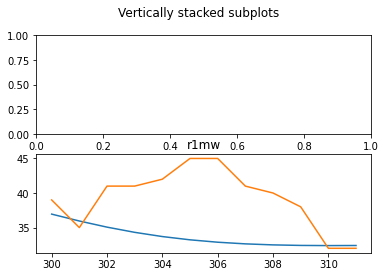

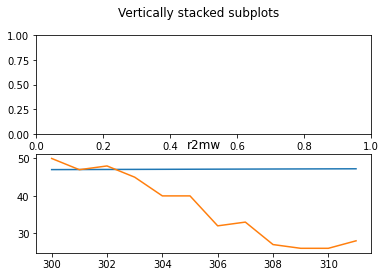

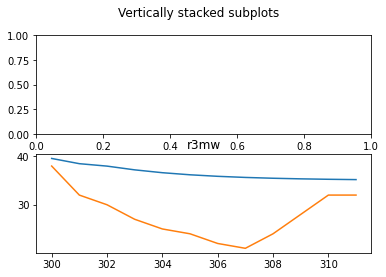

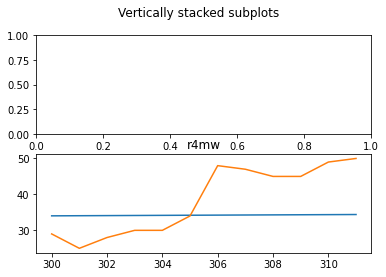

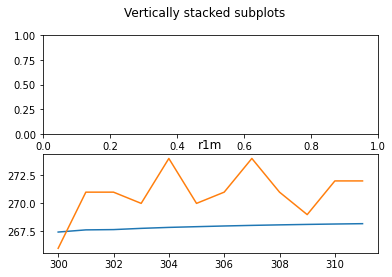

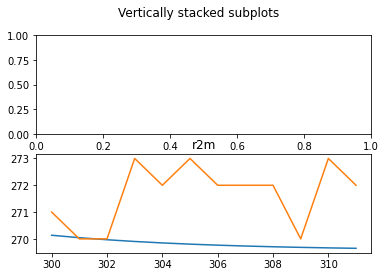

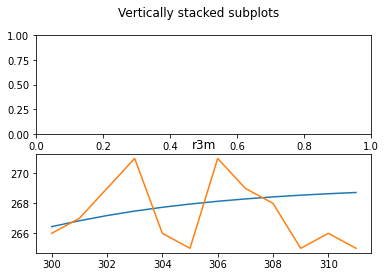

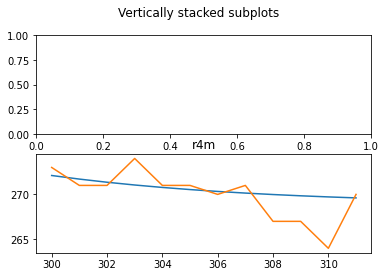

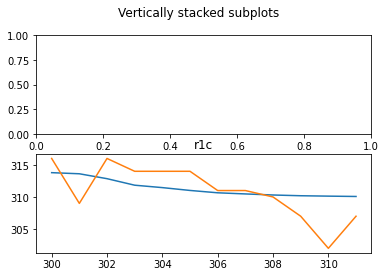

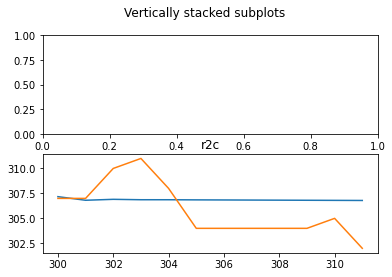

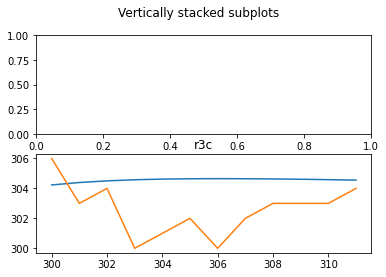

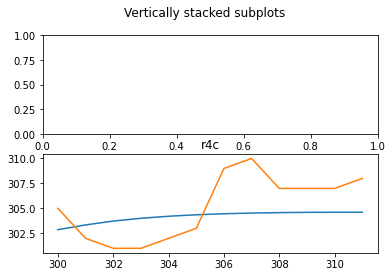

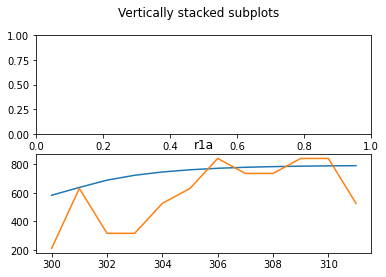

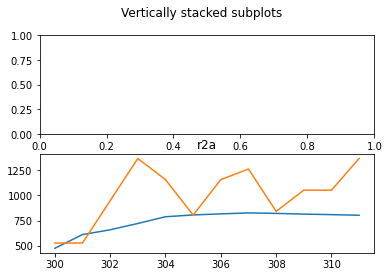

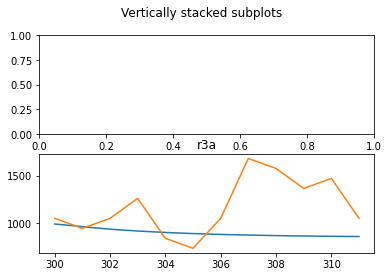

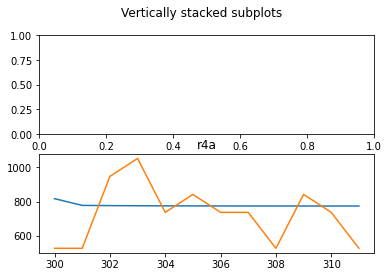

In [ ]:
a=0
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA

for i in products:
  model=ARIMA(train[i],order=tuple(orders[a]))
  model=model.fit()
  model.summary()
  start=len(train)
  end=len(train)+len(test)-1
  #if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
  #index_future_dates=pd.date_range(start='2014-01-30',end='2014-12-18',freq = 'W')
  pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
  #pred.index=index_future_dates
  fig, axs = plt.subplots(2)
  fig.suptitle('Vertically stacked subplots')
  axs[1].plot(pred)
  axs[1].plot(test[i])
  axs[1].set_title(i)

  print(i)
  rmse=sqrt(mean_squared_error(pred,test[i]))
  print('RMSE is: ' ,rmse)
  #r2s = r2_score(y_true = test[i], y_pred = pred)
  #print('R2 is: ', r2s)
  mapex = mape(actual = test[i], pred = pred)
  print('MAPE is: ', mapex)
  a=a+1

RMSE is:  7.054004808097956
R2 is:  -1.8672643745115436
MAPE is:  13.997077823303744


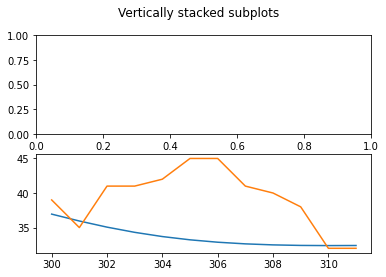

In [ ]:
#from sklearn.metrics import mean_absolute_percentage_error
model=ARIMA(train['r1mw'],order=(2,0,1))
model=model.fit()
model.summary()
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2014-01-30',end='2014-12-18',freq = 'W')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[1].plot(pred)
axs[1].plot(test['r1mw'])
rmse=sqrt(mean_squared_error(pred,test['r1mw']))
print('RMSE is: ' ,rmse)
r2s = r2_score(y_true = test['r1mw'], y_pred = pred)
print('R2 is: ', r2s)
mapex = mape(actual = test['r1mw'], pred = pred)
print('MAPE is: ', mapex)